## Imports

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #pip install matplotlib
import seaborn as sns #pip install seaborn

## Data collection

In [110]:
df1 = pd.read_csv('customer_segmentation_data.csv')
df2 = pd.read_csv('final_raw_sample_0_percent.csv')
df3 = pd.read_csv('insurance_data.csv')

In [111]:
df1.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [112]:
df2.head()

,Year,Company Name,Country,Industry (Exiobase),Total Environmental Intensity (Revenue),Total Environmental Intensity (Operating Income),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,Meat Production Capacity,Biodiversity,Abiotic Resources,Water production capacity (Drinking water & Irrigation Water),Wood Production Capacity,% Imputed
0,2018,TELEPERFORMANCE SE,France,Activities auxiliary to financial intermediati...,-1.09%,-10.05%,"(5,52,32,974)","(4,85,90,497)","(11,456)","(6,46,758)","(1,51,520)","(2,061)","(3,661)","(58,28,063)","1,042",2%
1,2018,SGS SA,Switzerland,Activities auxiliary to financial intermediati...,-0.81%,-5.31%,"(5,51,43,250)","(5,07,27,341)","(11,763)","(6,73,791)","(1,57,783)","(2,131)","(3,489)","(35,67,524)",571,0%
2,2018,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediati...,-1.53%,-9.38%,"(5,46,77,862)","(5,34,89,006)","(12,428)","(7,11,263)","(1,66,744)","(2,244)","(3,428)","(2,93,207)",458,1%
3,2018,APPLUS SERVICES SA,Spain,Activities auxiliary to financial intermediati...,-2.26%,-35.02%,"(4,32,98,590)","(1,89,12,678)","(4,652)","(2,49,594)","(58,535)",(811),"(3,850)","(2,40,69,048)",578,2%
4,2018,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediati...,-0.56%,-4.40%,"(3,08,62,191)","(3,01,89,038)","(7,276)","(4,02,067)","(94,143)","(1,298)","(3,953)","(1,65,542)","1,126",3%


In [113]:
df3.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [114]:
print("Shape of the dataset :", df1.shape)
print(df1.isnull().sum())
print(df1.dtypes)

Shape of the dataset : (53503, 20)
Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64
Customer ID                            int64
Age                                    int64
Gender                                object
Marital Status   

In [115]:
print("\nStatistical Summary of Numerical Columns:\n")
print(df1.describe())


Statistical Summary of Numerical Columns:

         Customer ID           Age   Income Level  Coverage Amount  \
count   53503.000000  53503.000000   53503.000000     53503.000000   
mean    52265.204998     44.140945   82768.324318    492580.789638   
std     28165.000067     15.079486   36651.075670    268405.505571   
min         1.000000     18.000000   20001.000000     50001.000000   
25%     28950.500000     32.000000   51568.500000    249613.500000   
50%     55858.000000     43.000000   80719.000000    477261.000000   
75%     76096.000000     57.000000  115973.500000    739124.000000   
max    100000.000000     70.000000  149999.000000   1000000.000000   

       Premium Amount  
count    53503.000000  
mean      3023.702447  
std       1285.834295  
min        500.000000  
25%       1817.000000  
50%       3194.000000  
75%       4311.500000  
max       5000.000000  


In [116]:
print("Shape of the dataset :", df2.shape)
print(df2.isnull().sum())
print(df2.dtypes)

Shape of the dataset : (13177, 16)
Year                                                               0
Company Name                                                       0
Country                                                            0
Industry (Exiobase)                                                0
Total Environmental Intensity (Revenue)                            0
Total Environmental Intensity (Operating Income)                 756
Total Environmental Cost                                           0
Working Capacity                                                   0
Fish Production Capacity                                           0
Crop Production Capacity                                           0
Meat Production Capacity                                           0
Biodiversity                                                       0
Abiotic Resources                                                  0
Water production capacity (Drinking water & Irrigation Water)      0

In [117]:
print("\nStatistical Summary of Numerical Columns:\n")
print(df2.describe())


Statistical Summary of Numerical Columns:

               Year
count  13177.000000
mean    2014.472186
std        2.505793
min     2010.000000
25%     2012.000000
50%     2015.000000
75%     2017.000000
max     2018.000000


In [118]:
print("Shape of the dataset :", df3.shape)
print(df3.dtypes)
print(df3.isnull().sum())

Shape of the dataset : (1340, 11)
index              int64
PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
dtype: object
index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64


In [119]:
print("\nStatistical Summary of Numerical Columns:\n")
print(df3.describe())


Statistical Summary of Numerical Columns:

             index    PatientID          age          bmi  bloodpressure  \
count  1340.000000  1340.000000  1335.000000  1340.000000    1340.000000   
mean    669.500000   670.500000    38.078652    30.668955      94.157463   
std     386.968991   386.968991    11.102924     6.106735      11.434712   
min       0.000000     1.000000    18.000000    16.000000      80.000000   
25%     334.750000   335.750000    29.000000    26.275000      86.000000   
50%     669.500000   670.500000    38.000000    30.400000      92.000000   
75%    1004.250000  1005.250000    47.000000    34.700000      99.000000   
max    1339.000000  1340.000000    60.000000    53.100000     140.000000   

          children         claim  
count  1340.000000   1340.000000  
mean      1.093284  13252.745642  
std       1.205334  12109.609288  
min       0.000000   1121.870000  
25%       0.000000   4719.685000  
50%       1.000000   9369.615000  
75%       2.000000  16604.

## Data Preparation and Cleaning 

In [120]:
# Convert 'Purchase History' date column in df1 to datetime format
df1['Purchase History'] = pd.to_datetime(df1['Purchase History'], errors='coerce')

# Function to clean and convert numeric columns in df2
def clean_numeric_column(series):
    return (series.astype(str)
            .str.replace('[^0-9.-]', '', regex=True)  # Remove non-numeric characters
            .replace('', np.nan)  # Replace empty strings with NaN
            .astype(float))  # Convert to float

In [121]:
# Apply cleaning function to specific columns in df2
df2['Total Environmental Intensity (Revenue)'] = clean_numeric_column(df2['Total Environmental Intensity (Revenue)'])
df2['Total Environmental Intensity (Operating Income)'] = clean_numeric_column(df2['Total Environmental Intensity (Operating Income)'])

In [122]:
# Create an Income Segmentation in df1
df1['Income Segment'] = pd.cut(df1['Income Level'], bins=[0, 30000, 60000, 100000, np.inf], 
    labels=['Low', 'Middle', 'High', 'Very High'])

# Create Environmental Impact Score in df2
df2['Environmental Impact Score'] = (
    df2['Total Environmental Intensity (Revenue)'].abs() + 
    df2['Total Environmental Intensity (Operating Income)'].abs()
) / 2

# Create a Risk Score in df3 based on insurance claims
df3['Risk Score'] = df3['claim'] / (df3['age'] + 1)

In [123]:
common_columns = set(df1.columns) & set(df2.columns) & set(df3.columns)
print("\nColonnes communes aux trois DataFrames :", common_columns)

common_df1_df2 = set(df1.columns) & set(df2.columns)
print("Colonnes communes entre df1 et df2 :", common_df1_df2)

common_df1_df3 = set(df1.columns) & set(df3.columns)
print("Colonnes communes entre df1 et df3 :", common_df1_df3)

common_df2_df3 = set(df2.columns) & set(df3.columns)
print("Colonnes communes entre df2 et df3 :", common_df2_df3)


Colonnes communes aux trois DataFrames : set()
Colonnes communes entre df1 et df2 : set()
Colonnes communes entre df1 et df3 : set()
Colonnes communes entre df2 et df3 : set()


In [124]:
if common_df1_df2:
    merged_df = df1.merge(df2, on=list(common_df1_df2), how='outer')
else:
    merged_df = df1.join(df2, how='outer')

if common_df2_df3:
    merged_df = merged_df.merge(df3, on=list(common_df2_df3), how='outer')
else:
    merged_df = merged_df.join(df3, how='outer')

merged_df.to_csv('merged_dataset.csv', index=False)
print("\nMerged dataset saved as 'merged_dataset.csv'")



Merged dataset saved as 'merged_dataset.csv'


In [125]:
merged_df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,...,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,Risk Score
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,2018-04-10,...,39.0,male,23.2,91.0,Yes,0.0,No,southeast,1121.87,28.04675
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,2018-11-06,...,24.0,male,30.1,87.0,No,0.0,No,southeast,1131.51,45.26040
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,2021-06-05,...,NaN,male,33.3,82.0,Yes,0.0,No,southeast,1135.94,NaN
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,2018-09-02,...,NaN,male,33.7,80.0,No,0.0,No,northwest,1136.40,NaN
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,2018-09-10,...,NaN,male,34.1,100.0,No,0.0,No,northwest,1137.01,NaN


## Data Visualizations and Analysis

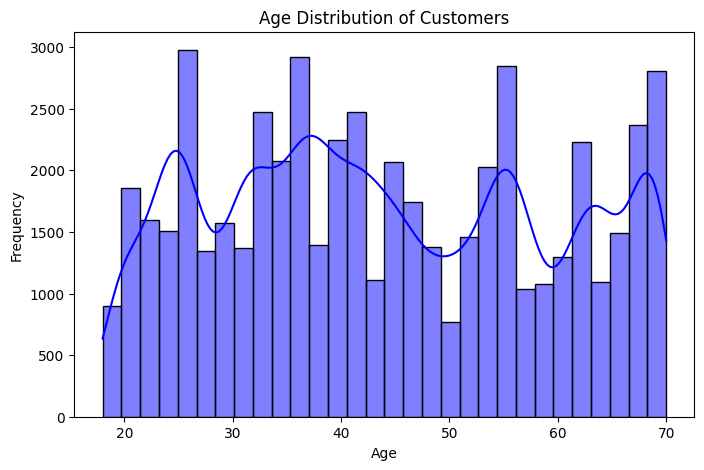

In [126]:
plt.figure(figsize=(8, 5))
sns.histplot(df1['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

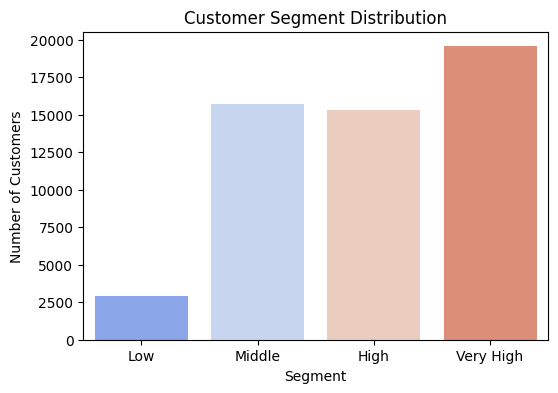

In [127]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Income Segment', hue='Income Segment', data=df1, palette='coolwarm', legend=False)
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

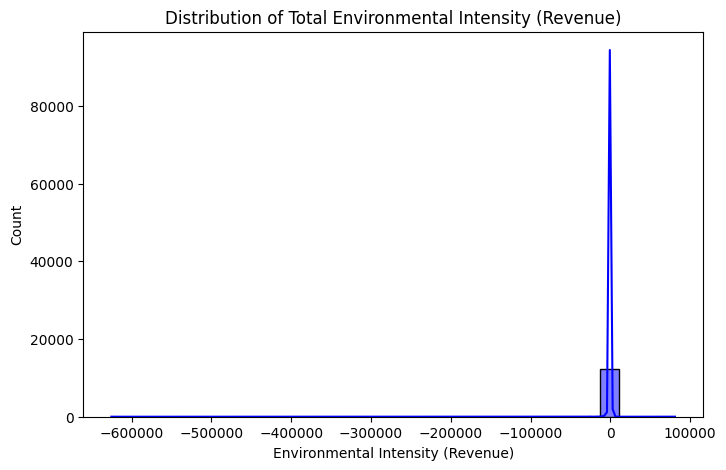

In [128]:
plt.figure(figsize=(8, 5))
sns.histplot(df2['Total Environmental Intensity (Operating Income)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Environmental Intensity (Revenue)')
plt.xlabel('Environmental Intensity (Revenue)')
plt.ylabel('Count')
plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_10452\3879304811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


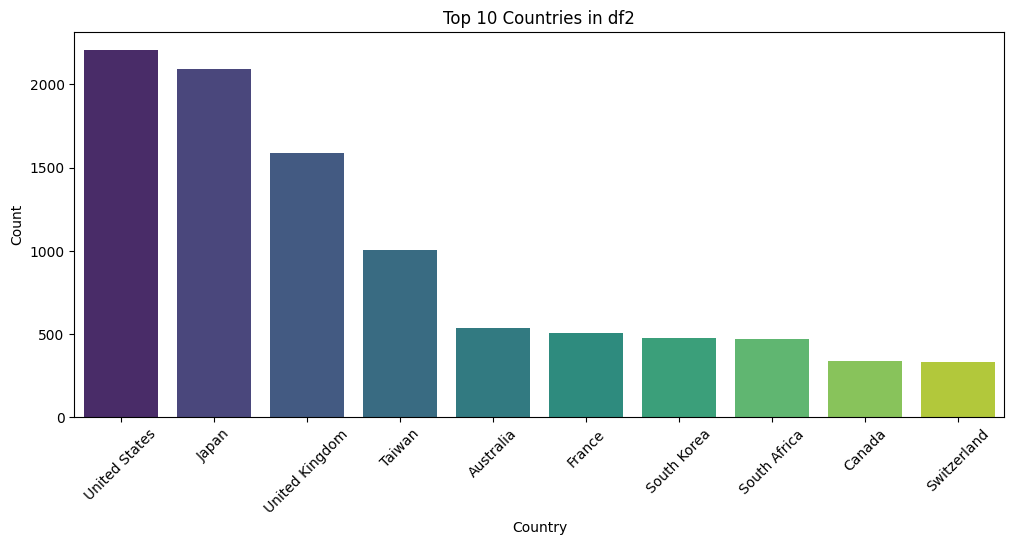

In [129]:
plt.figure(figsize=(12, 5))
top_countries = df2['Country'].value_counts().head(10)  # Show top 10 countries
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries in df2')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

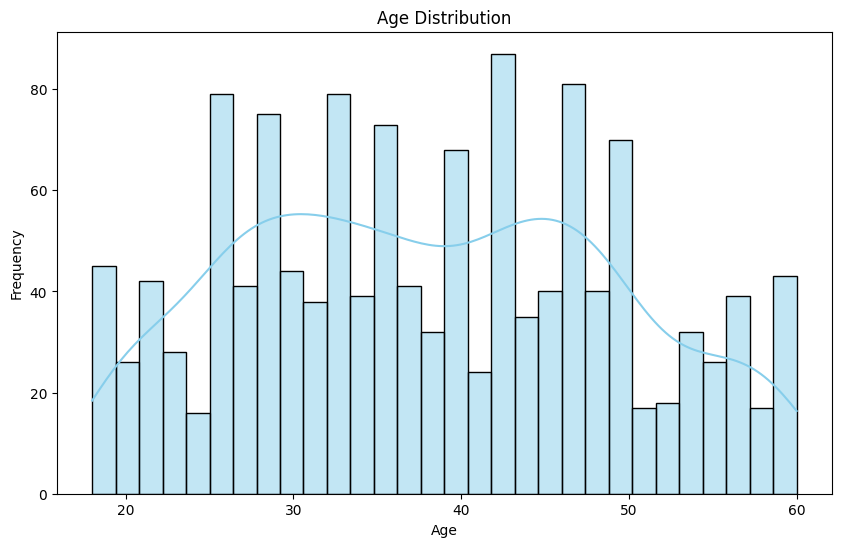

In [130]:
plt.figure(figsize=(10, 6))
sns.histplot(df3['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_10452\676554275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df3, palette='Set2')


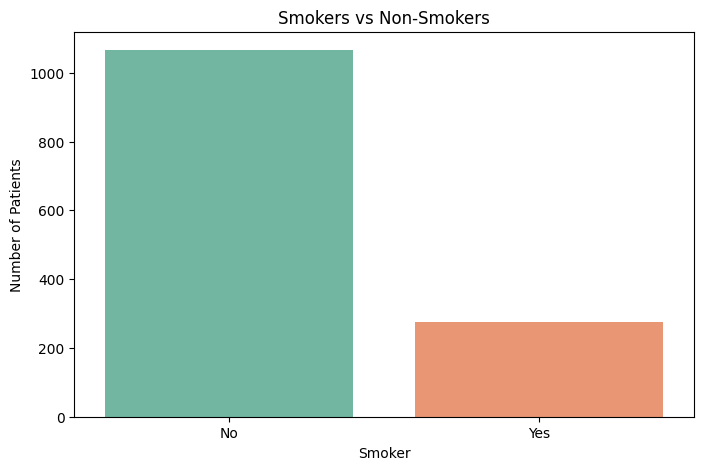

In [131]:
plt.figure(figsize=(8, 5))
sns.countplot(x='smoker', data=df3, palette='Set2')
plt.title('Smokers vs Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Number of Patients')
plt.show()

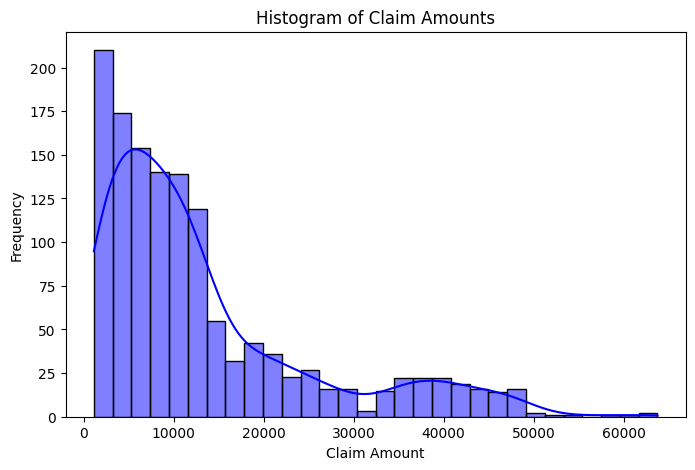

In [132]:
plt.figure(figsize=(8, 5))
sns.histplot(df3['claim'], bins=30, kde=True, color='blue')
plt.title('Histogram of Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()